# Seaborn

<br>

## 1) Distribution plots

In [35]:
import seaborn as sns

In [37]:
%matplotlib inline    # seaborn is 'based' on matplotlib, this command allows to get output in Jupyter Notebook more easily

In [3]:
tips = sns.load_dataset('tips')    # built-in dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<br>

### 1.1. Distplot
To show the distribution of a univariate (= 1 variable) set of observations.

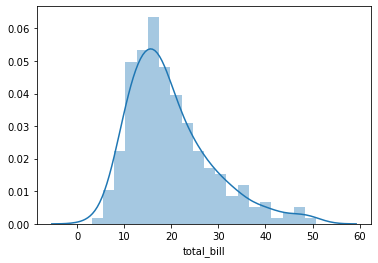

In [22]:
sns.distplot(tips['total_bill'], kde = True, bins=20)
# How are the total bills distributed?

Result = histogram with kernel density estimation (KDE) (a way to estimate the probability density function of a random variable)

<br>

### 1.2. Jointplot
As the name suggests, it 'joins' 2 distplots --> bivariate. 

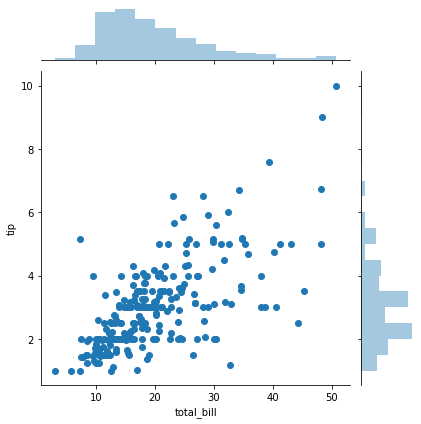

In [10]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

Result: scatter plot (default) of (total_bill, tip)

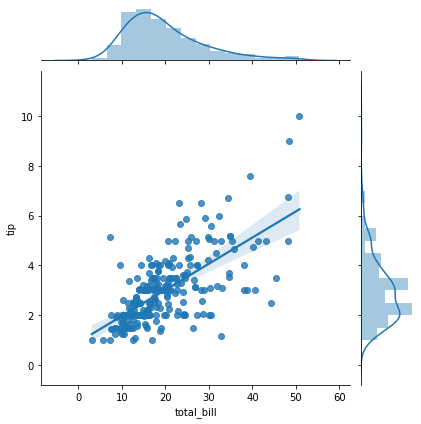

In [12]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

Result: Scatter plot with linear regression line

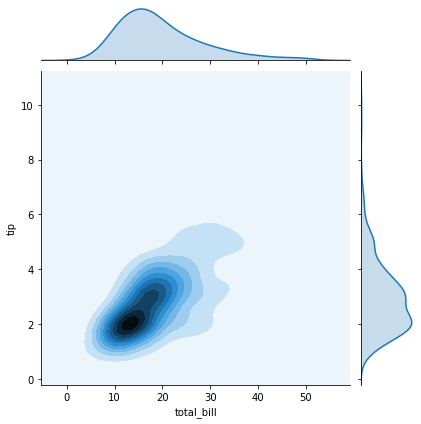

In [13]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde')

Result: 2D KDE to show density of datapoints ((x = total_bill, y = tip))

<br>

### 1.3. Pairplot
To plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

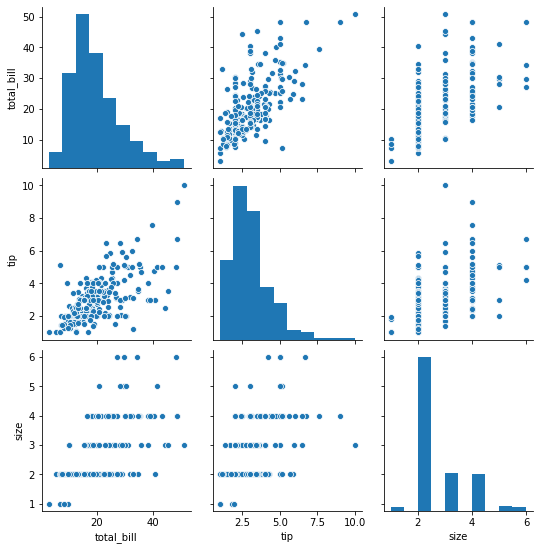

In [14]:
sns.pairplot(tips)

Result: pairwise relationship overview of numerical columns

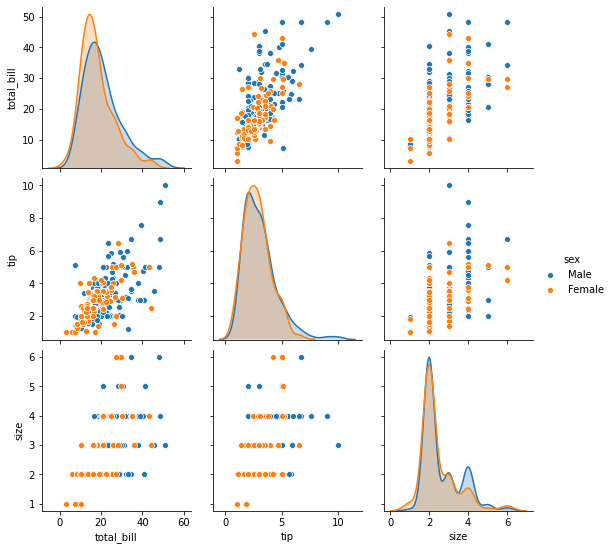

In [15]:
sns.pairplot(tips, hue = 'sex')

The column 'sex' is categorical (sex = male or female) --> Seaborn allows to visually differentiate

<br>

### 1.4. Rugplot
To draw a 'dash mark' for every point on a univariate distribution.

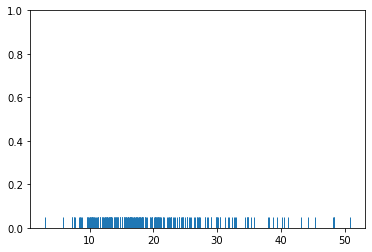

In [16]:
sns.rugplot(tips['total_bill'])

They are the building block of a KDE plot (the KDE plot will count how many dashes there are within the size of the bin)

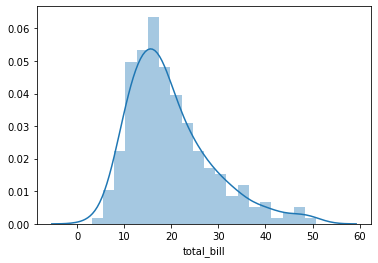

In [23]:
sns.distplot(tips['total_bill'], kde = True, bins=20)

Theory: the dash marks of a rugplot correspond to a normal distribution centered around that dash mark's position. If we sum these normal distributions (--> density), we get the KDE plot

<br>

## 2) Categorical plots

In [24]:
# import seaborn as sns
# %matplotlib inline

In [25]:
# tips = sns.load_dataset('tips')
# tips.head()

<br>

### 2.1. Barplot
To aggregate the categorical data based off some function, by default the mean

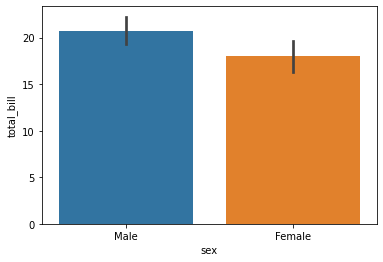

In [27]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

In [28]:
import numpy as np

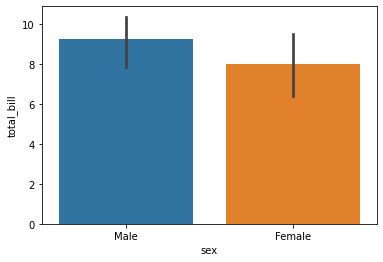

In [29]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

<br>

### 2.2. Countplot
Quasi the same as barplot except the estimator is explicitly counting the number of occurrences (which is why we only pass the x value)

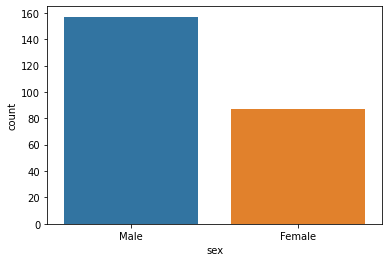

In [30]:
sns.countplot(x = 'sex', data = tips)

<br>

### 2.3. Boxplot
To show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

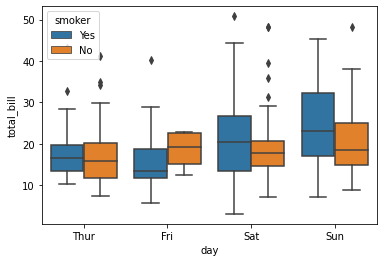

In [32]:
sns.boxplot(x = 'day' , y = 'total_bill', data = tips, hue = 'smoker')

<br>

### 2.4. Violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

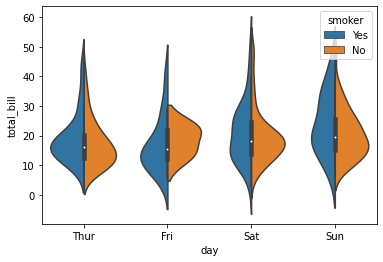

In [34]:
sns.violinplot(x = 'day',y = 'total_bill', data = tips, hue = 'smoker', split = True)

<br>

### 2.5. Stripplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

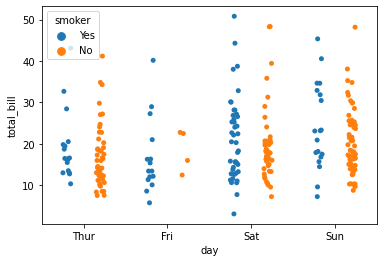

In [38]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker', dodge = True)

<br>

### 2.6. Swarmplot
The swarmplot is similar to the stripplot, but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them). It's basically a combination of the violin plot & strip plot

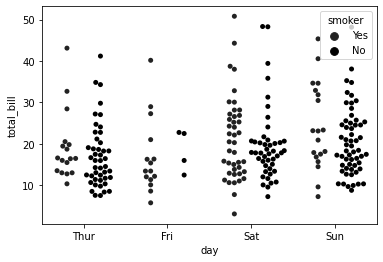

In [44]:
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker', dodge = True, color = 'black')

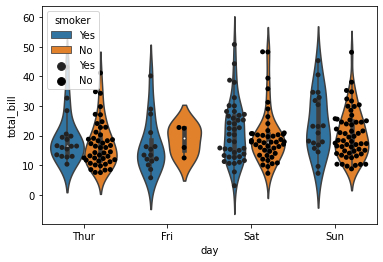

In [45]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker', dodge = True, color = 'black')

<br>

### 2.7. Factorplot (now: 'catplot')
A general form of a categorical plot that can take in a 'kind' parameter to adjust the plot type

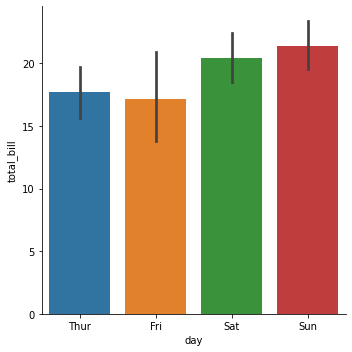

In [47]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

<br>

## 3) Matrix plots
Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data

In [48]:
# import seaborn as sns
# %matplotlib inline

In [49]:
# tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


<br>

### 3.1. Heatmap
In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colours it in.

In [60]:
cor = tips.corr()    # matrix form
cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


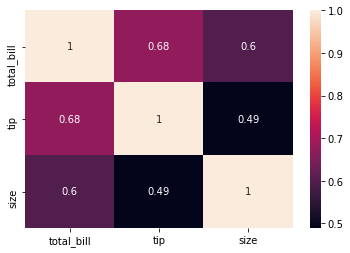

In [61]:
sns.heatmap(cor, annot = True)

In [66]:
flights_pivot = flights.pivot_table(values='passengers',index='month',columns='year')    # matrix form
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


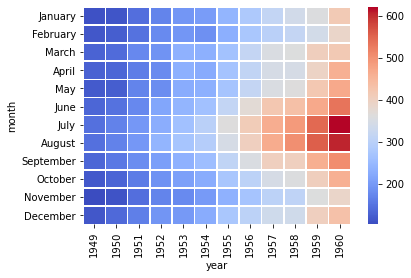

In [70]:
sns.heatmap(flights_pivot, cmap = 'coolwarm', linecolor = 'white', linewidths = 0.5)

<br>

### 3.2. Clustermap
The clustermap uses hierarchal clustering to produce a clustered version of the heatmap, whereas a heatmap will display it in the order we put it in. A clustermap will cluster based on similarities.

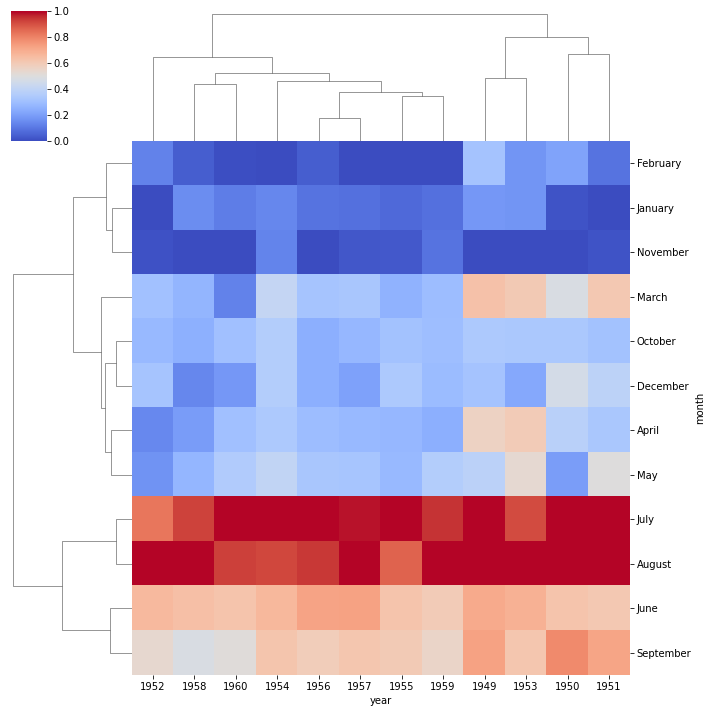

In [74]:
sns.clustermap(flights_pivot, cmap = 'coolwarm', standard_scale = 1)

Result: notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar, as in having high passenger count (makes sense, since they are both summer travel months).

<br>

## 4) Grids
Grids are general types of plots that allow you to map plot types to rows and columns of a grid. This helps you create similar plots separated by features.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
iris = sns.load_dataset('iris')    # revisiting the iris dataset!
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<br>

### 4.1. PairGrid
Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

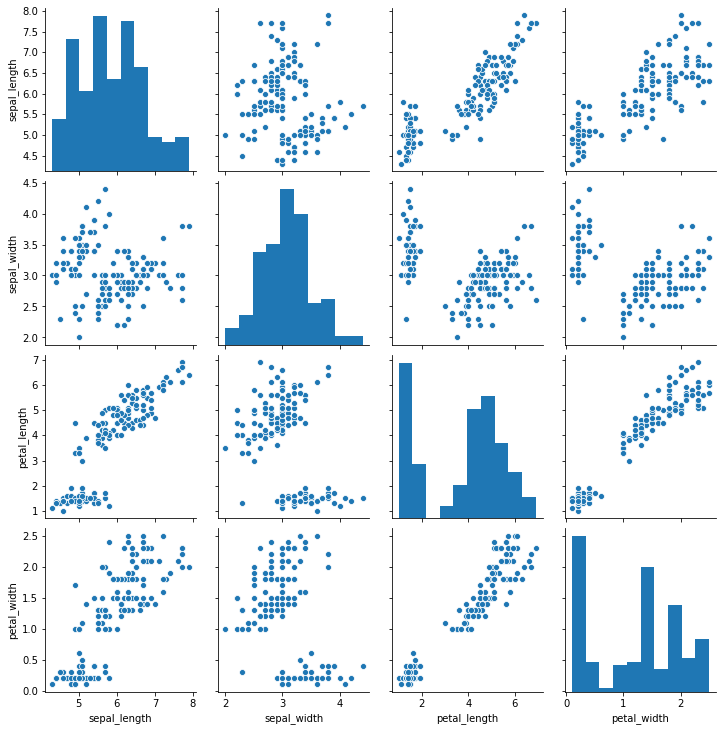

In [78]:
sns.pairplot(iris)    # Remember: 1.3. pairplot

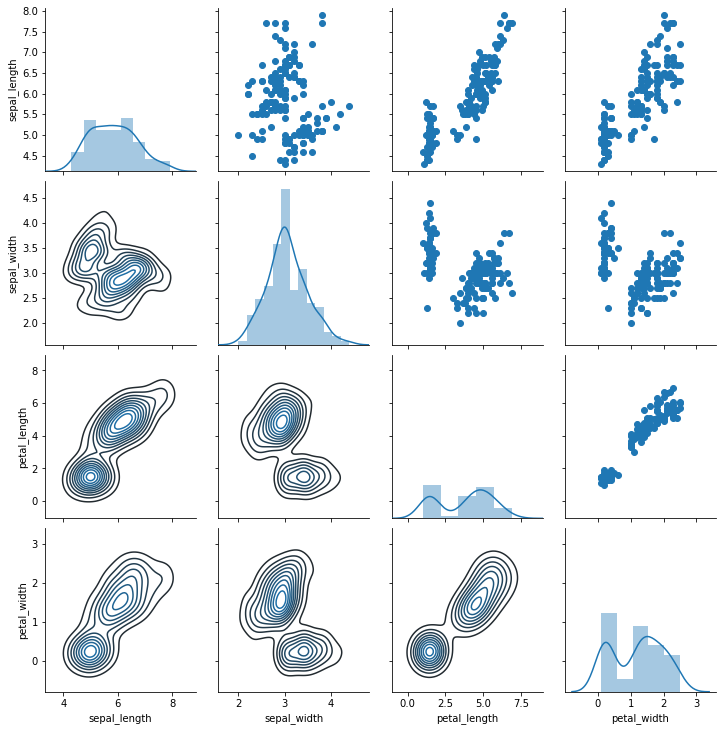

In [81]:
pg = sns.PairGrid(iris)    # Use PairGrid to customize pairplot more
pg.map_diag(sns.distplot)
pg.map_upper(plt.scatter)
pg.map_lower(sns.kdeplot)

<br>

### 4.2. FacetGrid
The general way to create grids of plots based off of a feature.

In [82]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


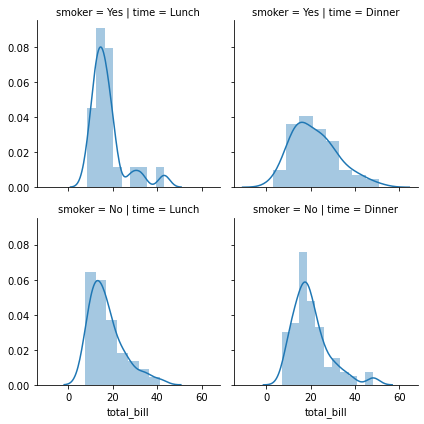

In [83]:
fg = sns.FacetGrid(data = tips, row = 'smoker', col = 'time')
fg.map(sns.distplot, 'total_bill')

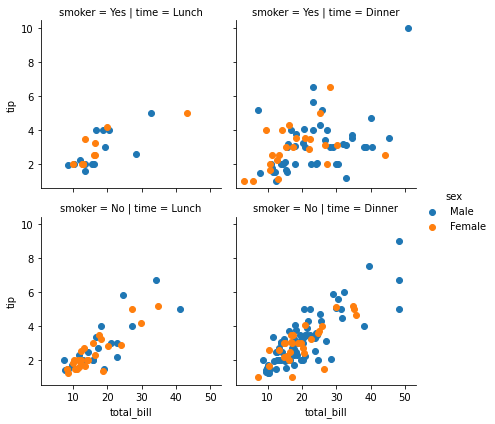

In [85]:
fg2 = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
fg2 = fg2.map(plt.scatter, "total_bill", "tip").add_legend()

<br>

### 4.3. JointGrid
JointGrid is the general version for jointplot type grids.

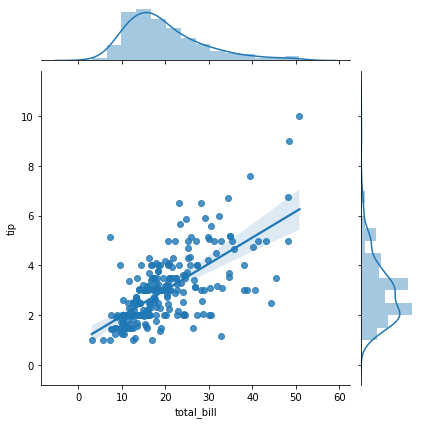

In [87]:
jg = sns.JointGrid(x="total_bill", y="tip", data=tips)
jg = jg.plot(sns.regplot, sns.distplot)

<br>

## 5) Regression plots
Note: I'll be using regression analysis & plotting in a machine learning project!
Please refer to machine_learning_projects > regression.ipynb.

In [88]:
# import seaborn as sns
# %matplotlib inline

In [89]:
# tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 5.1. Lmplot
lmplot allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as colouring the hue based off of features

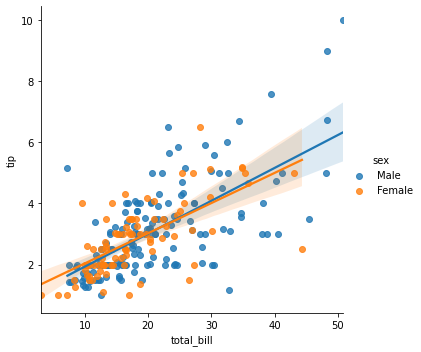

In [91]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips, hue = 'sex')

<br>

### 5.2. Markers

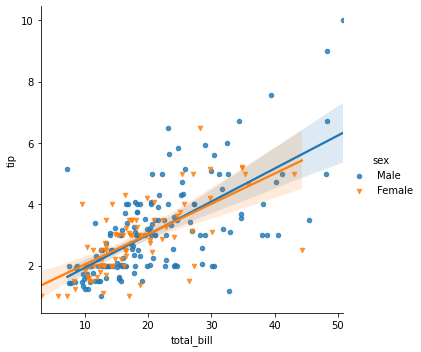

In [93]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips, hue = 'sex',
          markers = ['o', 'v'],
          scatter_kws={'s': 20})

<br>

### 5.3. Using a Grid
We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments.

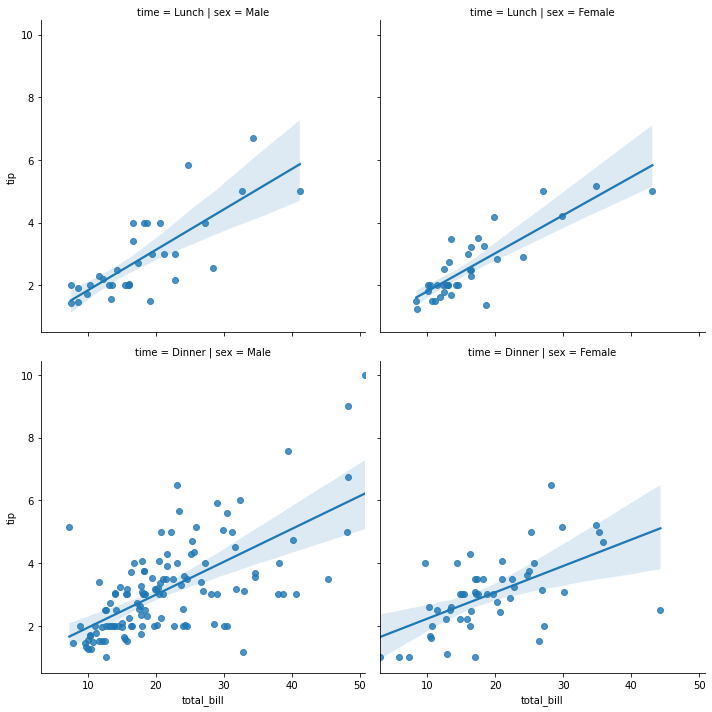

In [97]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips, row = 'time', col = 'sex')

<br>

### 5.4. Aspect ratio & size (now: 'height')

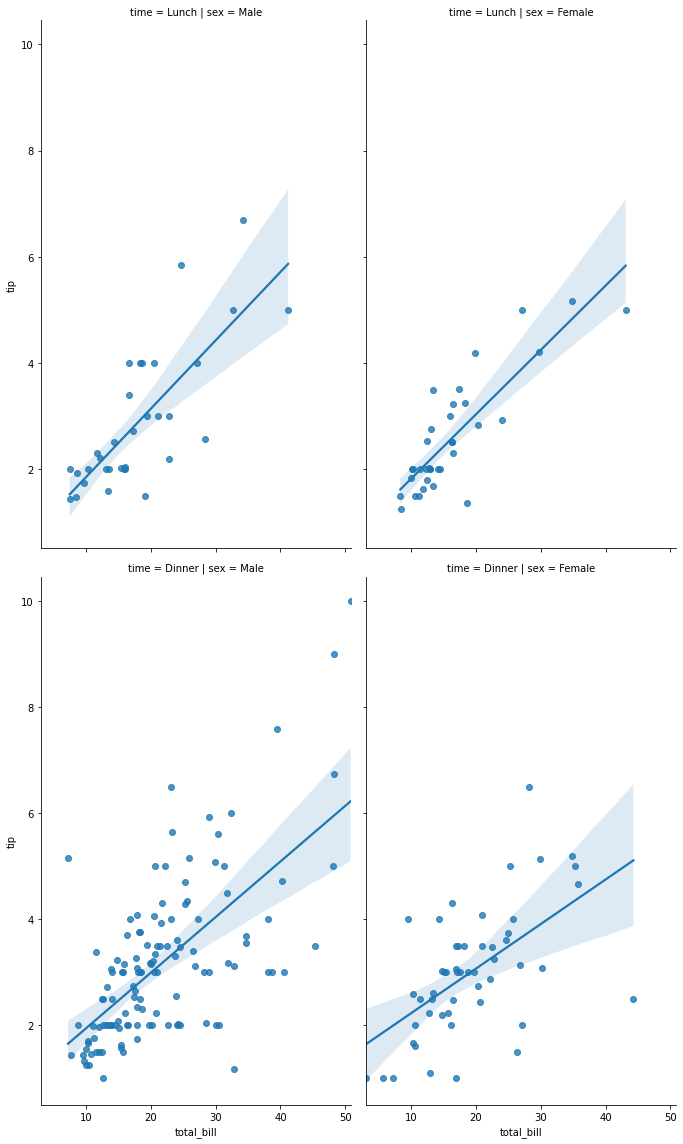

In [101]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips,row = 'time', col = 'sex',
          aspect = 0.6,
          height = 8)

<br>

## 6) Style & colour

In [1]:
# import seaborn as sns
# %matplotlib inline

In [3]:
# tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


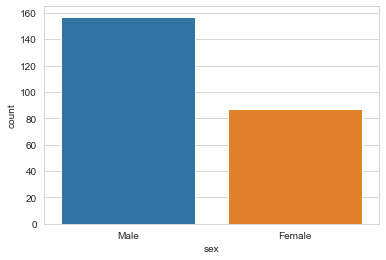

In [10]:
sns.countplot(x = 'sex', data = tips)

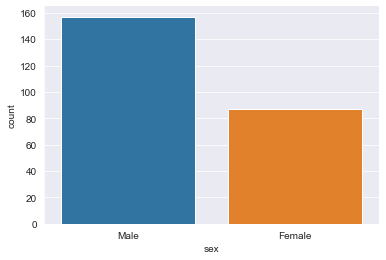

In [13]:
sns.set_style('darkgrid')    # style
sns.countplot(x = 'sex', data = tips)
sns.despine()    # remove right & upper spine

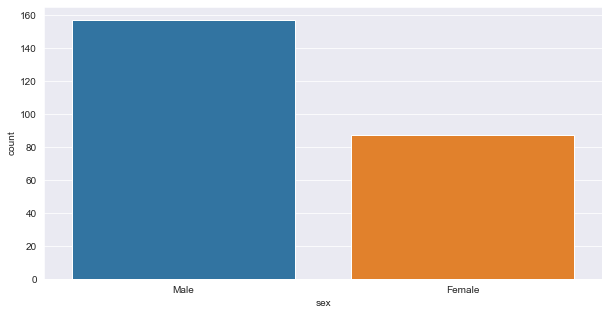

In [20]:
plt.figure(figsize = (10,5))    # figure size --> non-grid plots
sns.countplot(x = 'sex', data = tips)

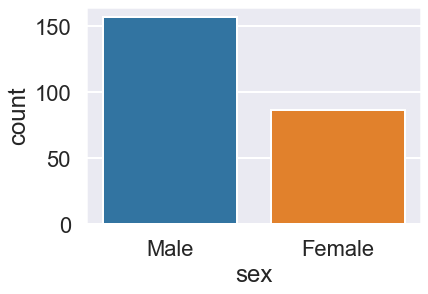

In [25]:
sns.set_context('poster')    # --> poster size
sns.countplot(x = 'sex', data = tips)

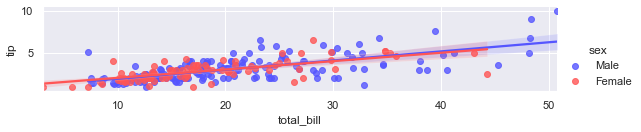

In [31]:
sns.set_context('notebook')
sns.lmplot(x = 'total_bill', y = 'tip', 
           height = 2, 
           aspect = 4, 
           data = tips, hue = 'sex', 
           palette = 'seismic')
# grid plots

<br>